In [1]:
!pip install spacy


In [2]:
!pip install wordcloud

In [3]:
import numpy as np 
import pandas as pd
import string
import spacy 
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

In [4]:
em=pd.read_csv('Elon_musk.csv', encoding = 'latin-1')
em

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
em=em.drop('Unnamed: 0',axis=1)
em

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
em = [Text.strip() for Text in em.Text] 
em = [Text for Text in em if Text] 
em

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [7]:
nlp = spacy.load('en_core_web_sm')

In [8]:
afinn = pd.read_csv('Afinn.csv', error_bad_lines=False, sep = ",", encoding = 'latin-1')
afinn

C:\Users\hites\AppData\Local\Temp\ipykernel_5944\654385464.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  afinn = pd.read_csv('Afinn.csv', error_bad_lines=False, sep = ",", encoding = 'latin-1')


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hites\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(em))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [11]:
df = pd.DataFrame(sentences, columns=['sentence'])
df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [12]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [13]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) 
    return sent_score

In [14]:
df['sentiment_value'] = df['sentence'].apply(calculate_sentiment)

In [15]:
df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [16]:
df.sort_values(by = 'sentiment_value').head()

,sentence,sentiment_value
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8
837,Cool Model 3 review by @iamjamiefoxx https://t...,-8
64,"Also, the road to hell is mostly paved with ba...",-7
920,"It may never pay out, as the stock cant b ht...",-4
680,"Occasional flights from land are ok, but frequ...",-4


In [17]:
df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value
81,@teslaownersSV This is a good one @MrBeastYT I...,13
585,The open areas https://t.co/rabjKrtQlw @Sav...,14
105,@Erdayastronaut @SpaceX Was also thinking that...,16
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16
719,We just havent observed the https://t.co/mez...,17


In [18]:
calculate_sentiment(text = 'Definitely feel <U+0001F4AF> if I take DayQuil.')

0

In [19]:
calculate_sentiment(text = '@ICannot_Enough @Erdayastronaut @rweb11742 Pretty close.')

1

In [20]:
len(em)

1999

In [21]:
text = ' '.join(em)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [22]:
len(text)

158702

In [23]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [24]:
len(no_punc_text)

148032

In [25]:
def plot_cloud(wordcloud):
    
    plt.figure(figsize=(60, 40))

    plt.imshow(wordcloud) 
    
    plt.axis("off")

In [26]:
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')
stopwords.add('s')

In [27]:
wordcloud = WordCloud(width = 3000, 
                      height = 2000,
                      background_color = 'black',
                      max_words = 100,
                      colormap = 'Set2',
                      stopwords = stopwords).generate(no_punc_text)

<Figure size 600x400 with 0 Axes>

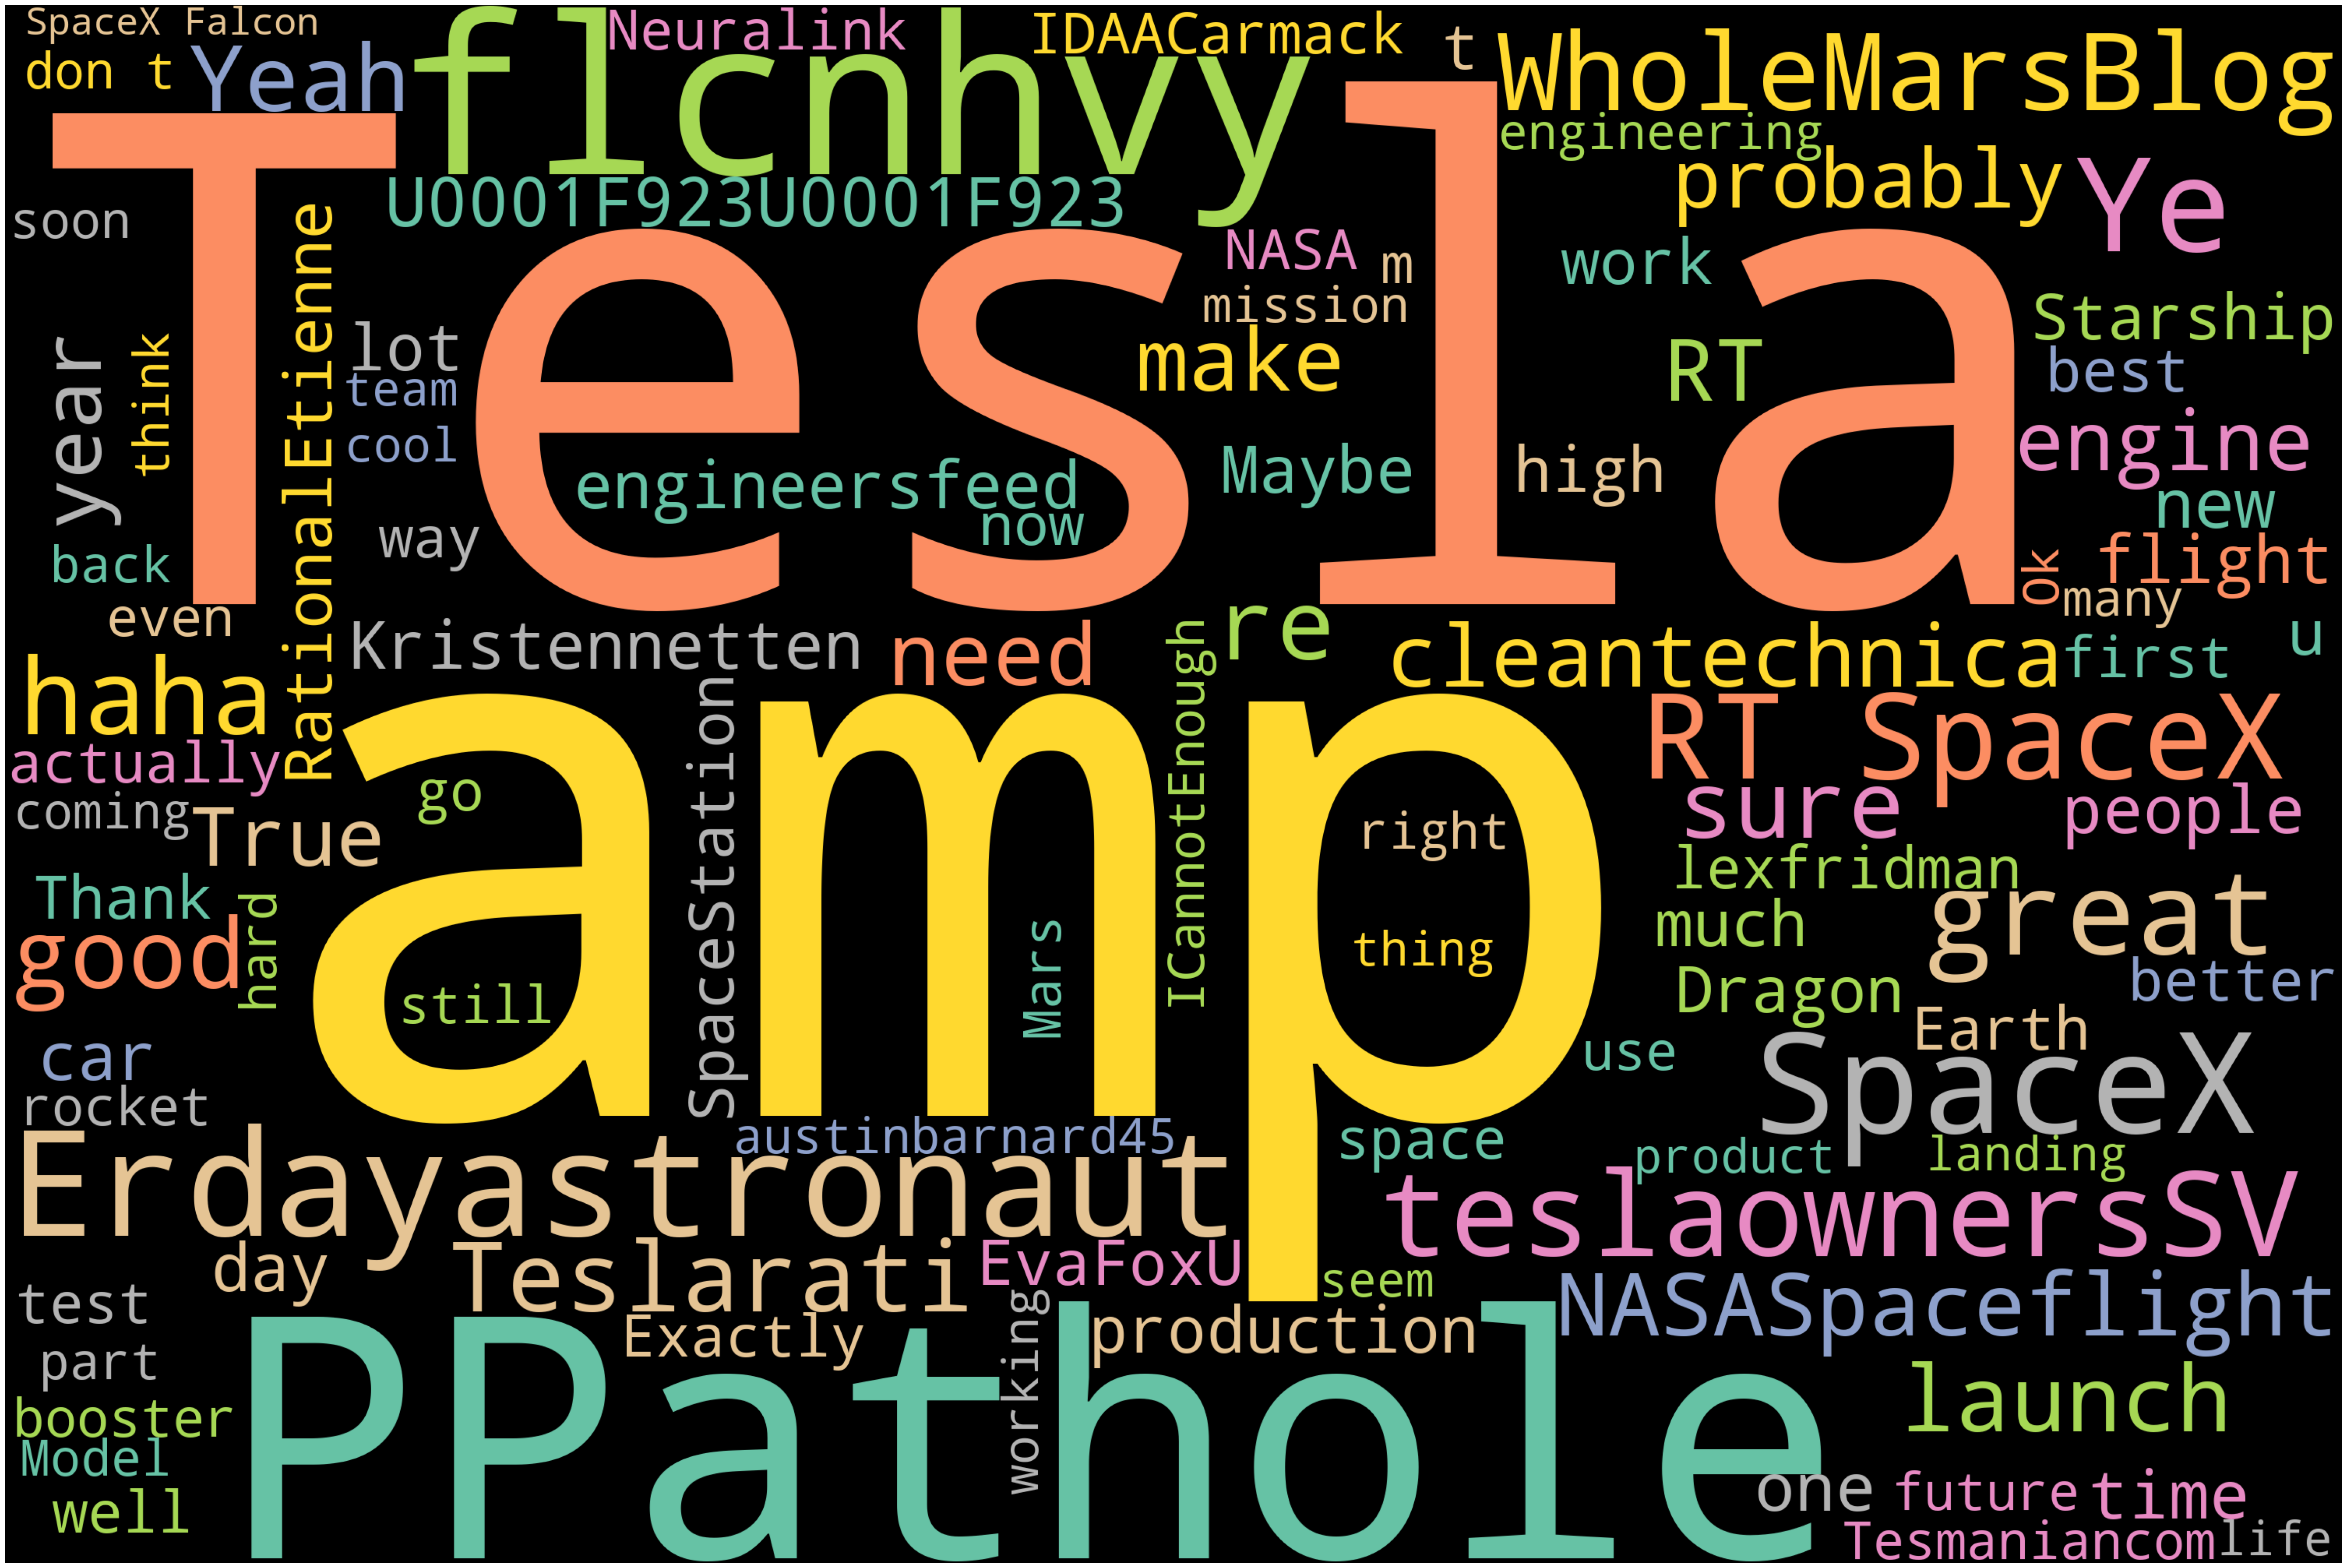

In [28]:
plt.figure(figsize = (6,4))
plot_cloud(wordcloud)
plt.show()